<a href="https://colab.research.google.com/github/risker93/Hello_World/blob/main/2021_06_09_%EC%8B%A4%EC%8A%B52.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [5]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [8]:
#이렇게 결측값을 확인하기도 한다.
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [9]:
df.isnull().sum()
#두 코드가 같은지 확인해보자.
#같다.

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

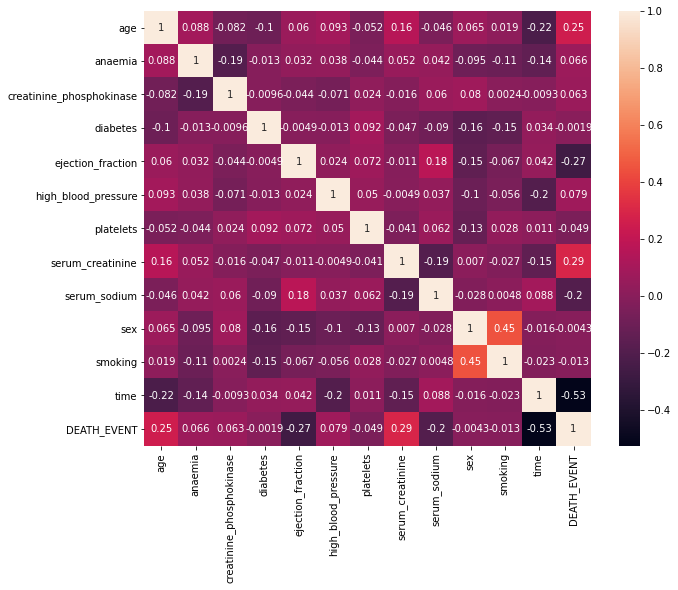

In [10]:
'''
heatmap
'''
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

y값을 기준으로 슥 보고

큰 값을 한번 확인해 본다.

이렇게 확인 하기도 하는데,

실제 데이터는 일일이 다 확인을 해보아야 한다.

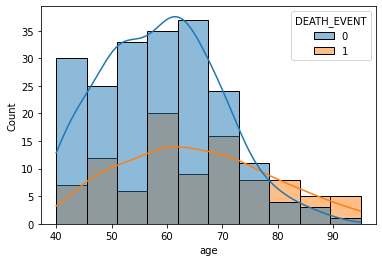

In [11]:
sns.histplot(x='age', data=df, hue='DEATH_EVENT', kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


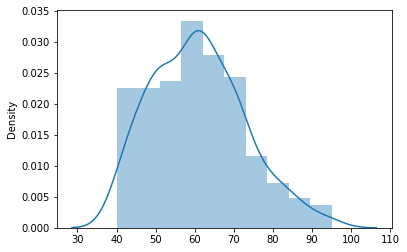

In [12]:
sns.distplot(x=df['age'])

분류 모델이 아니라면 이런식으로 분포를 확인해도 된다.

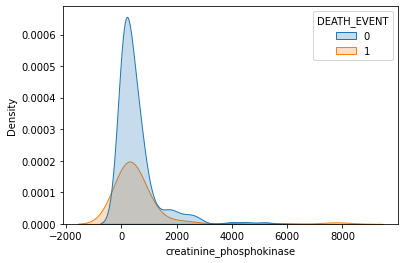

In [13]:
sns.kdeplot(data=df, x='creatinine_phosphokinase',shade=True, hue='DEATH_EVENT')

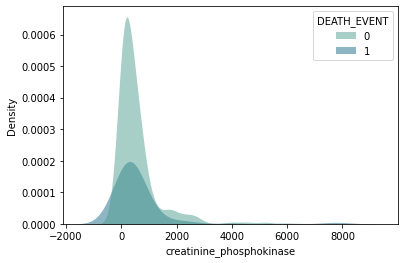

In [14]:
sns.kdeplot(
    data=df, x='creatinine_phosphokinase', hue='DEATH_EVENT',
    fill=True,
    palette='crest',
    linewidth=0,
    alpha=.5
)

이런 것들도 있구나 하고 알고 넘어가자

In [15]:
'''
왜도(skewness)
'''
from scipy.stats import skew
print(skew(df['age']))
print(skew(df['serum_sodium']))
print(skew(df['serum_creatinine'])) #
print(skew(df['platelets']))  #
print(skew(df['time'])) 
print(skew(df['creatinine_phosphokinase']))  #
print(skew(df['ejection_fraction']))


0.4209365580238486
-1.04287046392733
4.433610162782361
1.4549745335147466
0.12716059964019436
4.440688625555512
0.5525926588215331


0인 경우 완벽한 대칭

-1보다 작거나 1보다 크면 분포 자체가 외곡이 된다는 것을 의미.

수치로 판단하는 경우인데,

수치로 좋게 나온다고 해서 그림으로 좋게 나오지 않을수도 있다.

In [16]:
#안좋은 것들을 확인해 보자.
df['serum_creatinine'] = np.log(df['serum_creatinine']) #4.433610162782361
print(skew(df['serum_creatinine']))

1.5760322454685072


실제 데이터를 사용할때 원본 데이터는 건드리지 않고 사본을 만들어 사용하도록 해라.

**정리**

치우친 값을 해결하는방법 지수함수를 쓰고

큰 값을 줄이는 방법은 로그함수를 써라.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


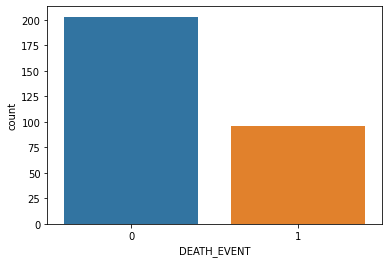

In [17]:
sns.countplot(df['DEATH_EVENT'])

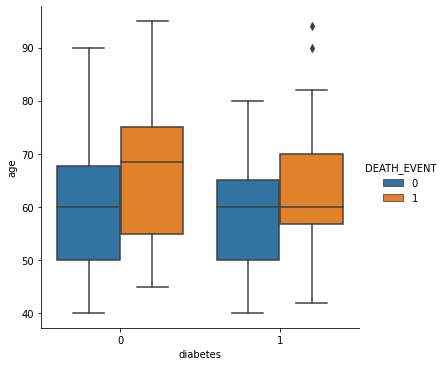

In [18]:
sns.catplot(x='diabetes', y='age', hue='DEATH_EVENT',kind="box",data=df)

범주형 데이터가 어디로 들어가나, 수치형 데이터는 어디로 들어가나.

결과 값은 어떻게 넣나. 이런것들을 알고 있어야 한다.